In [2]:
y=[1,2,3,4,5]
y1=[0.8,2.5,3,4.8,4.4]

# formula
# r_square=1-(sum e1^2 / sum e2^2 )
# e1=y-y1 then e1^2
# e2=y-mean then e2^2


In [3]:
from sklearn.metrics import r2_score
r_square=r2_score(y,y1)
print("cofficent of determination ", r_square) 

cofficent of determination  0.871


In [5]:
import pandas as pd
df=pd.DataFrame({
    "area":[2600,3000,3200,3600,4000],
    "price":[550000,565000,610000,680000,725000]})

In [6]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [8]:
# fromula apply
# y=mx+b
# price=m*area + b

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

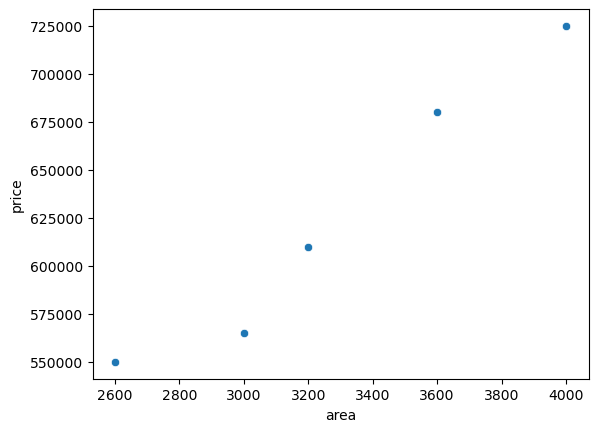

In [12]:
sns.scatterplot(data=df,x='area',y='price')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [15]:
x=df['area']
y=df['price']

In [16]:
reg.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[2600 3000 3200 3600 4000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
# two away we can convert into 2D array
df.area.values

array([2600, 3000, 3200, 3600, 4000], dtype=int64)

In [19]:
# 1st way
df.area.values.reshape(-1,1)

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]], dtype=int64)

In [20]:
''' assume shape(2,4) whaen reshape(-1,1) then they are convert 2*4=8 so 2d array is (8,1)'''

' assume shape(2,4) whaen reshape(-1,1) then they are convert 2*4=8 so 2d array is (8,1)'

In [21]:
x=df.area.values.reshape(-1,1)
reg.fit(x,y)

LinearRegression()

In [22]:
# another way
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [23]:
reg.fit(df[['area']],y)

LinearRegression()

In [24]:
reg.predict([[3300]])  # output is alway in 1d array

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
# with formula

In [25]:
reg.coef_  # this constant represent slope m

array([135.78767123])

In [26]:
reg.intercept_  # this contant represent intercept b

180616.43835616432

In [27]:
# price=area*m+b
price=3300*135.78767123+180616.43835616432

In [28]:
price

628715.7534151643

In [29]:
# so predicative value and formula value is same, so method is right
reg.predict([[5500]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([927448.63013699])

In [31]:
# find r2_Score value
from sklearn.metrics import r2_score
y_original=df.price
y_predicative=reg.predict(df[['area']])
r_square=r2_score(y_original,y_predicative)
print("r2 square value is " , r_square)

r2 square value is  0.9584301138199486


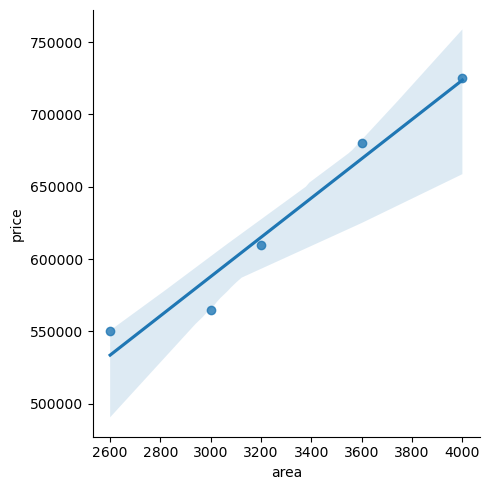

In [33]:
sns.lmplot(data=df,x='area',y='price')
plt.show()

In [34]:
# traing and testing phase
df=pd.read_csv(r"C:\Users\kunal  kumar  pandey\Downloads\archive (13)\Salary_Data.csv")

In [35]:
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [36]:
df.shape

(6704, 2)

In [37]:
df.tail(5)

,Years of Experience,Salary
6699,20.0,200000.0
6700,3.0,50000.0
6701,4.0,55000.0
6702,14.0,140000.0
6703,1.0,35000.0


In [38]:
df.isnull().sum()

Years of Experience    3
Salary                 5
dtype: int64

In [39]:
df.dropna()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
6699,20.0,200000.0
6700,3.0,50000.0
6701,4.0,55000.0
6702,14.0,140000.0


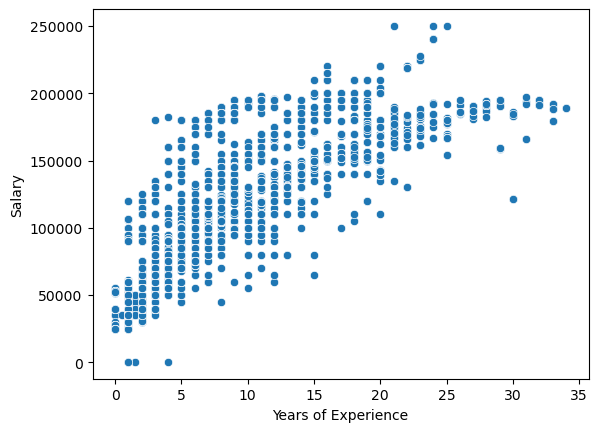

In [58]:
sns.scatterplot(data=df,x='Years of Experience' ,y='Salary')
plt.show()

In [59]:
x=df.iloc[:,:-1].values
x

array([[ 5.],
       [ 3.],
       [15.],
       ...,
       [ 4.],
       [14.],
       [ 1.]])

In [60]:
# only 1st column for y value
y=df.iloc[:,1]
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6699, dtype: float64

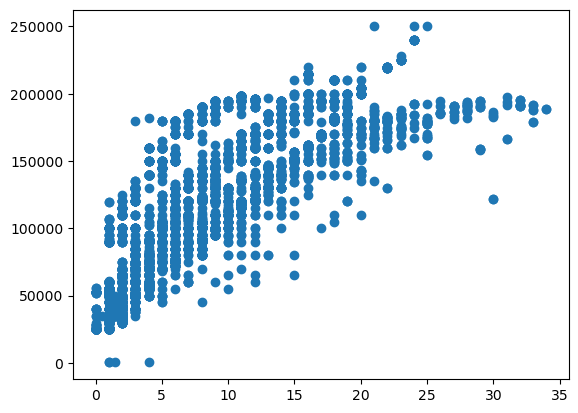

In [61]:
plt.scatter(x,y)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  # also used test_size=0.7

In [63]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [54]:
df.dropna(inplace=True)

In [55]:
df.isnull().sum()

Years of Experience    0
Salary                 0
dtype: int64

In [65]:
reg.fit(x_train,y_train)

LinearRegression()

In [67]:
# test the model by passing the test data and predicate the model
y_pred=reg.predict(x_test)

In [68]:
y_pred

array([178111.32463064,  87035.16604068,  73023.44933453, ...,
        87035.16604068,  59011.73262838, 171105.46627756])

In [70]:
# find the r square value and comapre the test data
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_pred)
r_square*100  # accurecy

66.79782811413457

In [71]:
# predicate the new value
print(reg.predict([[11]]))

[136076.17451219]


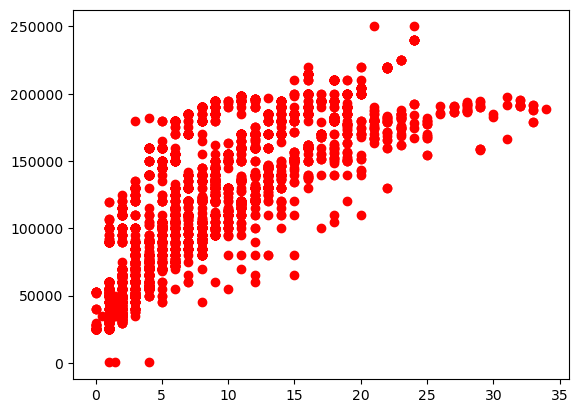

In [72]:
plt.scatter(x_train,y_train,color='red')
plt.show()

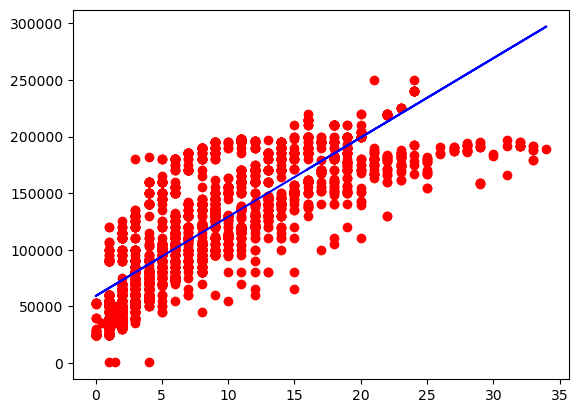

In [74]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,reg.predict(x_train),color='blue')
plt.show()

In [106]:
# new data set predication
df=pd.read_csv(r"C:\Users\kunal  kumar  pandey\Downloads\archive (16)\canada_per_capita_income.csv")
df.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [94]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [95]:
df.keys()

Index(['year', 'per capita income (US$)'], dtype='object')

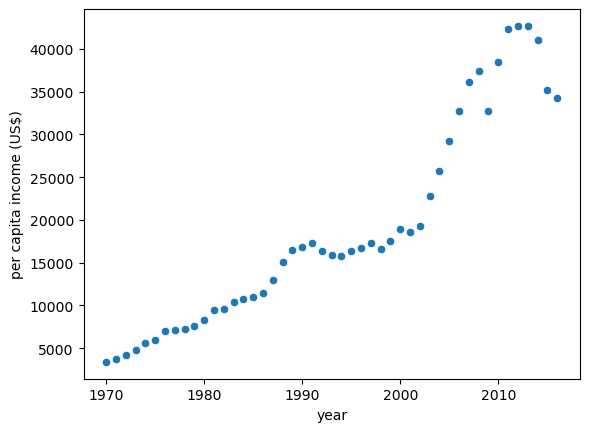

In [96]:
sns.scatterplot(data=df,x='year' , y='per capita income (US$)')
plt.show()

In [97]:
x=df.iloc[:,0:1].values
x

array([[1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]], dtype=int64)

In [98]:
y=df.iloc[:,1]
y

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

In [99]:
df.shape

(47, 2)

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_trst=train_test_split(x,y,test_size=0.3,random_state=0)

In [101]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [102]:
reg.fit(x_train,y_train)

LinearRegression()

In [103]:
y_pred=reg.predict(x_test)
y_pred

array([23866.56302985, 28104.14918647, 25561.5974925 ,  3526.14947809,
       15391.39071662,  9458.77009735, 35731.80426838, 26409.11472382,
       18781.45964191,  8611.25286603, 23019.04579853, 27256.63195514,
       24714.08026117, 36579.3214997 ,  1831.11501545])